## An analysis of the COVID-19's Lockdown effect on the Pollution level in India 


![](https://cdn-images-1.medium.com/max/800/1*KUQSMz2mVeOlUYvtSgvSRQ.gif)


*The air around India Gate in Delhi, before and after Lockdown*
*Source: https://www.theguardian.com/environment/2020/apr/11/positively-alpine-disbelief-air-pollution-falls-lockdown-coronavirus*

On March 25 2020, the Indian government placed its population of more than 1.3 billion citizens under lockdown in an effort to reduce the spread of the COVID-19 disease. All non-essential shops, markets and places of worship were closed with only essential services including water, electricity and health services remaining active.

Citizens started to experience better air quality so much so that the scenic Dhauladhar Peaks of Himachal Pradesh became visible from neighbouring states. On normal days, these peaks lie hidden behind he film of smog.

![](https://pbs.twimg.com/media/EUqZ7QIVAAA5Dz1?format=jpg&name=large)

*source: https://twitter.com/manaman_chhina/status/1245977571625299968*

## Objective

Here we have access to a large amount of granular data relating to the  concentration of major air pollutants in India and it will be interesting to see if the claim of reduced air pollution is being actually backed by data. Before going further let's understand about the constituents of Air Pollution

## Types of Air Pollutants

Let's first try and understand the various types of air pollutants in the datasets. On a broader level, these pollutants can be classified as :

![](https://imgur.com/C4q7gwX.png)

* **Particulate matter (PM2.5 and PM10)**
>
Particulate matter is a mix of solids and liquids, including carbon, complex organic chemicals, sulphates, nitrates, mineral dust, and water suspended in the air. PM varies in size. Some particles, such as dust, soot, dirt or smoke are large or dark enough to be seen with the naked eye. But the most damaging particles are the smaller particles, known as PM10 and PM2.5.[Source](https://www.blf.org.uk/support-for-you/air-pollution/types). The following diagram will help to understand the concept more concretely.

* **Nitrogen Oxides** (NO, NO<sub>2</sub>, NO<sub>x</sub>)
>
Nitrogen oxides are a group of seven gases and compounds composed of nitrogen and oxygen, sometimes collectively known as NOx gases.The two most common and hazardous oxides of nitrogen are nitric oxide(NO) and nitrogen dioxide(NO<sub>2</sub>)

* **Sulphur Dioxide**(SO<sub>2</sub>)
>
Sulfur dioxide, or SO<sub>2</sub> is a colorless gas with a strong odor, similar to a just-struck match. It is formed when fuel containing sulfur, such as coal and oil, is burned, creating air pollution.

* **Carbon Monoxide**(CO)
>
Carbon monoxide is a colorless, highly poisonous gas. Under pressure, it becomes a liquid. It is produced by burning gasoline, natural gas, charcoal, wood, and other fuels.

* **Benzene, Toluene and Xylene** (BTX)
>
Benzene, toluene, xylene, and formaldehyde are well-known indoor air pollutants, especially after house decoration. They are also common pollutants in the working places of the plastic industry, chemical industry, and leather industry

* **Ammonia**( NH<sub>3</sub>)
>
[Ammonia pollution](https://en.wikipedia.org/wiki/Ammonia_pollution) is pollution by the chemical ammonia (NH3) – a compound of nitrogen and hydrogen which is a byproduct of agriculture and industry.

* **Ozone**(O<sub>3</sub>)
>
[Ground-level ozone](https://www.canada.ca/en/environment-climate-change/services/air-pollution/pollutants/common-contaminants/ground-level-ozone.html) is a colorless and highly irritating gas that forms just above the earth's surface. It is called a "secondary" pollutant because it is produced when two primary pollutants react in sunlight and stagnant air. These two primary pollutants are nitrogen oxides (NOx) and volatile organic compounds (VOCs).

## Methodology

In this notebook, the analysis has been done in two parts:

* Analysis of the pollution level in India, over the years - from 2015 to 2020
> This will a holistic view of how the pollutant levels have been rising in India and what is the current situation.

*  Effect of Locksown on the Pollution level in India
> Here we shall examine the pollution level in India before and after the first stage of Lockdown.
> Also we shall compare the pollution level around the same months in 2019, to see the the difference, if any.
> Additionally we could also examine the difference between the the current dates and the winter months(October, November) of 2019 when the pollution levels are generally the highest in Northern parts of India.


Analyzing data under these different categories should give us a fair idea of the effect of Lockdown on the Indian pollution level.

In [ ]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
!pip install chart_studio
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#py.init_notebook_mode(connected=True)

#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

#Racing Bar Chart
!pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
city_day = pd.read_csv('../input/air-quality-data-in-india/city_day.csv')
#city_hour = pd.read_csv('../input/air-quality-data-in-india/city_hour.csv')
#station = pd.read_csv('../input/air-quality-data-in-india/stations.csv')
#station_day = pd.read_csv('../input/air-quality-data-in-india/station_day.csv')
#station_hour = pd.read_csv('../input/air-quality-data-in-india/station_hour.csv')
cities_db = pd.read_csv('../input/indian-cities-database/Indian Cities Database.csv')


# <a> 1. A first look at City level- daily data</a>

We have daily and hourly city data as well as daily and hourly Station data. Station refers to the continuous pollution monitoring stations operated and maintained by the Central Pollution Control Board (CPCB) and the State Pollution Control Boards. 
Let's begin by analyzing the various cities' daily data to get a big picture. We shall begin by importing the dataset and the necessary libraries for the analysis.


In [ ]:
display("CITY DAILY DATA")
display(city_day.head(5))

In [ ]:
city_day.info()

There seems to be a lot of missing values in the dataset. Additionally, the Date column is also not in the Date-Time format. 

## <a> 1.1 Missing Values </a>

It is always a good idea to see the missing values as a percentage of total values

In [ ]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(city_day)
missing_values.style.background_gradient(cmap='Reds')

> ** 📌 Points to note :** 
> * It seems that we have a lot of null values in some columns e.g.Xylene and NH3.There could be a couple of reasons for the missing data:
  * Station does not have device to capture it.
  * Issue in the meter reading.

Here is a notebook that I wrote on handling missing data in Python. it includes a section on Missing values in Time Series problems too .
[Handling missing values in Python](https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values)


## <a> 1.2 Cities in the dataset</a>

In [ ]:
cities = city_day['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

## <a> 1.3 Convert to Date Time format</a>

Let's convert the `Date` column into Date Time format with the help of `datetime` library.

In [ ]:
# Convert string to datetime64
city_day['Date'] = pd.to_datetime(city_day['Date'])
#city_day.set_index('Date',inplace=True)


## <a> 1.4 Data Availability</a>

In [ ]:
print(f"The available data is between {city_day['Date'].min()} and {city_day['Date'].max()}")

# <a>2. Analysing the complete City Level Daily Data</a>

Let's now analyse the work with the data to see what patterns and insights we can uncover from it.

## <a> 2.1 Combining the Benzene, Toluene and Xylene levels into one column - BTX</a>

In [ ]:
city_day['BTX'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']
city_day.drop(['Benzene','Toluene','Xylene'],axis=1);



## <a> 2.2 Combining the PM2.5 and PM10 into one column - Particulate Matter</a>

In [ ]:
city_day['Particulate_Matter'] = city_day['PM2.5']+city_day['PM10']

## <a> 2.3 Subsetting columns</a>

Even though a lot of columns have been provided in the dataset, we shall select a few prominent ones. Let's create a new dataframe called `pollutants` containg the major pollutants responsible for air pollution.

In [ ]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BTX']

## <a> 2.3 Visualising yearly data </a>

I'll plot the data as dots instead of lines since with so many data points, the line plot will become crowded and will be hard to read.

In [ ]:

city_day.set_index('Date',inplace=True)
axes = city_day[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

> ** 📌 Points to note :** 
> * PM2.5 and PM10 pollution show a seasonal effect, with pollution being higher in winter months as compared to the summer ones.
> * SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also. The same pattern is also reflected in BTX levels also.

This is just an overview. We will have to look deeper to get specific answers. 


In [ ]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

## <a> 2.4 Year and Month wise distribution </a>

Next, let’s further explore the seasonality of our data with box plots. We shall use boxplots to group the data by different time periods and display the distributions for each group. We’ll group the data by year and month. All measurements are in `ug / m3`.

### <a> 2.4.1 NO<sub>2</sub> </a>

In [ ]:
city_day.reset_index(inplace=True)
df = city_day.copy()
value='NO2'
trend_plot(df,value)

### <a> 2.4.2 SO<sub>2</sub> </a>

In [ ]:
#city_day.reset_index(inplace=True)
df = city_day.copy()
value='SO2'
trend_plot(df,value)

### <a> 2.4.3 BTX </a>

In [ ]:

value='BTX'
trend_plot(df,value)

### <a> 2.4.4 PM2.5 </a>

In [ ]:
value='PM2.5'
trend_plot(df,value)

### <a> 2.4.5 PM10 </a>

In [ ]:

value='PM10'
trend_plot(df,value)

> ** 📌 Points to note :** 
> * There is a clear trend that pollution level in India falls in the month of July and August. This might be majorly because monsoon sesason sets in during these months.The BTX levels additionally show a major decline around April.
> * The pollution level then start rising and reach highest leveks in winter months. Again, its during these months that a lot of crop residue burning takes place,especially in northern parts of India.
> * SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also. The same pattern is also reflected in BTX levels also.
> * The median values of 2020 are generally less as compared to other years giving us a sense that there might be a reduction on pollution lately.



# <a> 3. Most Polluted Indian Cities </a>

Let's now look at the Indian cities which contribute to maximum pollution. We shall output the top 10 cities in each pollutant category by mean concentration of the pollutant over the years.Government of India has laid down [National Ambient Air Quality standards (NAAQS)](http://www.indiaenvironmentportal.org.in/files/file/Permissible%20Level%20for%20Pollutants.pdf) for twelve air pollutants, namely, PM10, PM2.5, Carbon Monoxide (CO), Sulphur Dioxide (SO2), Nitrogen Dioxide (NO2), Ammonia (NH3), ground level Ozone (O3), Lead,
Arsenic, Nickel, Benzene and Benzo (a) Pyrene. The relevant standards are mentioned below:

![](https://imgur.com/3GqVxly.png)

In [ ]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [ ]:
#source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
btx = max_polluted_city('BTX')


display_side_by_side(pm2_5,pm10,no2,so2,co,btx)

> ** 📌 Points to note :** 
> * Patna, Delhi , Ahmedabad and Kolkata seem to top the charts. Ahmedabad has maximum concenterations of NO2,SO2 as well as CO levels.

Let's also look at the above data visually to get a better perspective

In [ ]:

x2= city_day[['PM2.5','City']].groupby(["City"]).median().sort_values(by='PM2.5',ascending=False).reset_index()
x3 = city_day[['PM10','City']].groupby(["City"]).median().sort_values(by='PM10',ascending=False).reset_index()

from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("PM2.5","PM10"))

fig.add_trace(go.Bar( y=x2['PM2.5'], x=x2["City"],  
                     marker=dict(color=x2['PM2.5'], coloraxis="coloraxis")),
              1, 1)


fig.add_trace(go.Bar( y=x3['PM10'], x=x2["City"],  
                     marker=dict(color=x3['PM10'], coloraxis="coloraxis")),
              1, 2)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.show()

In [ ]:
x4= city_day[['CO','City']].groupby(["City"]).median().sort_values(by='CO',ascending=False).reset_index()
x5 = city_day[['NO2','City']].groupby(["City"]).median().sort_values(by='NO2',ascending=False).reset_index()
x6 = city_day[['SO2','City']].groupby(["City"]).median().sort_values(by='SO2',ascending=False).reset_index()


from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("CO","NO2",'SO2'))

fig.add_trace(go.Bar( y=x4['CO'], x=x4["City"],  
                     marker=dict(color=x4['CO'], coloraxis="coloraxis")),
              1, 1)


fig.add_trace(go.Bar( y=x5['NO2'], x=x5["City"],  
                     marker=dict(color=x5['NO2'], coloraxis="coloraxis")),
              1, 2)

fig.add_trace(go.Bar( y=x6['SO2'], x=x5["City"],  
                     marker=dict(color=x6['SO2'], coloraxis="coloraxis")),
              1, 3)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.update_yaxes(title_text="ug / m3", row=1, col=3)
fig.show()

# <a>4. Effect of Lockdown on AQI</a>

Let's now see how has the Lockdown affected the AQI levels in the prominent cities of India.For this we shall consider the data from 2019 onwards only. But before that let's understand what AQI is:

## <a>4.1 AQI : Air Quality Index</a>

An air quality index (AQI) is used by government agencies[1] to communicate to the public how polluted the air currently is or how polluted it is forecast to become.There are six AQI categories, namely Good, Satisfactory, Moderately polluted, Poor, Very Poor, and Severe. The proposed AQI will consider eight pollutants (PM10, PM2.5, NO2, SO2, CO, O3, NH3, and Pb) for which short-term (up to 24-hourly averaging period) National Ambient Air Quality Standards are prescribed.[23] Based on the measured ambient concentrations, corresponding standards and likely health impact, a sub-index is calculated for each of these pollutants. The worst sub-index reflects overall AQI. Likely health impacts for different AQI categories and pollutants have also been suggested, with primary inputs from the medical experts in the group. The AQI values and corresponding ambient concentrations (health breakpoints) as well as associated likely health impacts for the identified eight pollutants are as follows:[[Wikipedia](https://en.wikipedia.org/wiki/Air_quality_index)]

![](https://imgur.com/JwXoMrw.png)
source: https://app.cpcbccr.com/AQI_India/

> Incase you want to know how the AQI is calculated, here is a neat notebook [Calculating AQI (Air Quality Index) Tutorial](https://www.kaggle.com/rohanrao/calculating-aqi-air-quality-index-tutorial) which explains the concept in a lot of detail.

## <a>4.2 AQI for some of the major cities of India</a>

The cities that will be the subject of our study are - Ahmedabad, Delhi, Bengaluru, Mumbai,Hyderabad and Chennai.

In [ ]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

In [ ]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=1,
    #specs=[[{}, {}],
          # [{"colspan": 6}, None]],
    subplot_titles=("Ahmedabad","Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai'))

fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Ahmedabad'],
                    marker=dict(color=AQI_pivot['Ahmedabad'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Bengaluru'],
                    marker=dict(color=AQI_pivot['Bengaluru'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Chennai'],
                    marker=dict(color=AQI_pivot['Chennai'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Delhi'],
                    marker=dict(color=AQI_pivot['Delhi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Hyderabad'],
                    marker=dict(color=AQI_pivot['Hyderabad'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Mumbai'],
                    marker=dict(color=AQI_pivot['Mumbai'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])

fig.show()

> ** 📌 Points to note :** 
> * The black vertical line shows the date on which the first phase of lockdown ame into effect in India.
> * The above graph shows the variation of various pollutant levels, from Jan 2019 onwards till date.
> * Apparantely, all the above Indian cities seem to be a dangerously high level of pollution levels.
> * Clearly, there appears to be a rapid decline after 25th March,2020 in all the cities under sonsideration.

## <a> 4.3 AQI in 2020 </a>

Let plot a racing bar chart to see the overall AQI in 2020. Please refer to https://github.com/dexplo/bar_chart_race for the code.

In [ ]:
#Source code for racing barchart: https://github.com/dexplo/bar_chart_race
AQI_2020 = AQI_pivot[AQI_pivot.index > '2019-12-31']
bcr_html = bcr.bar_chart_race(df=AQI_2020, filename=None, period_length=300,orientation='v',figsize=(8, 6),bar_label_size=7,tick_label_size=7,title='AQI levels in 2020')
HTML(bcr_html)

## <a> 4.4 AQI before and after Lockdown </a>

It'll be also interesting to see tha difference in AQI before and after the Lockdown.

In [ ]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']

In [ ]:
print(AQI_beforeLockdown.mean())
print(AQI_afterLockdown.mean())

In [ ]:
# Helper functions

#source: http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [ ]:
#source: http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/
from matplotlib.patches import Circle, Wedge, Rectangle
def gauge(labels=['GOOD','SATISFACTORY','MODERATE','POOR','VERY POOR','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    

"""
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

In [ ]:
display("Ahmedabad's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=5, title='Ahmedabad AQI before Lockdown') 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title='Ahmedabad AQI After Lockdown') 




In [ ]:
display("Delhi's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=4, title="Delhi's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Delhi's AQI after Lockdown") 


In [ ]:
display("Mumbai's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Mumbai's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Mumbai's AQI after Lockdown") 


# <a> 5 Effect of Lockdown on levels of Individual pollutants <a> 
Let's compare the level of pollutants between January and April between between 2020 and 2019. This will give an idea whether the pollution levels have actually subsided or the pollution actually remains low during the onset of summer in India.
    
## <a> 5.1 A comparison between pollution levels in 2020 VS 2019    

In [ ]:
#city_day.set_index('Date',inplace=True)

start_date1 = '2019-01-01'
end_date1 = '2019-05-01'

mask1 = (city_day['Date'] >= start_date1) & (city_day['Date']  <= end_date1)
pollutants_filtered_2019 = city_day.loc[mask1]
pollutants_filtered_2019.fillna(method='bfill',inplace=True)
pollutants_filtered_2019.set_index('Date',inplace=True);

start_date2 = '2020-01-01'
end_date2 = '2020-05-01'

mask2 = (city_day['Date'] >= start_date2) & (city_day['Date']  <= end_date2)
pollutants_filtered_2020 = city_day.loc[mask2]
pollutants_filtered_2020.fillna(method='bfill',inplace=True)
pollutants_filtered_2020.set_index('Date',inplace=True);


df1 = pollutants_filtered_2019[pollutants_filtered_2019.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]
df2 = pollutants_filtered_2020[pollutants_filtered_2020.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]

In [ ]:
def pollution_comparison(city):
    """
    Function to plot graph comparing pollutin levels between (Jan-May)2019 and (Jan-May)2020
    
    """
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2019 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2020 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()


In [ ]:
pollution_comparison('Ahmedabad')


> Range Slider

There is a Time slider in the above graph. A range slider allows users to pan and zoom the X-axis while maintaining an overview of the chart. 

In [ ]:
pollution_comparison('Bengaluru')

In [ ]:
pollution_comparison('Chennai')

In [ ]:
pollution_comparison('Delhi')

In [ ]:
pollution_comparison('Mumbai')

In [ ]:
pollution_comparison('Hyderabad')

> ** 📌 Points to note :** 
> * It is interesting to note that the Polluiton level in India genrally drops down as summer approaches. This can also be corroborated by the graphs above.
> * However, the reduction in march 2020 is more pronounced as compared to march 2019

# <a> 6. Geographical Analysis using Dual Maps </a>
A dual map let's you compare the values side by side.By clicking on the icons, you can see the value of AQI on the popups</a>



In [ ]:
df11 = pollutants_filtered_2019[['City','AQI']]
df22 = pollutants_filtered_2020[['City','AQI']]

df_2019_coord = df11.groupby('City')['AQI'].mean().to_frame().reset_index()
df_2020_coord = df22.groupby('City')['AQI'].mean().to_frame().reset_index()

df_2019_AQI = pd.merge(df_2019_coord,cities_db,on='City')
df_2019_AQI['AQI'] = df_2019_AQI['AQI'].round(0)
df_2020_AQI = pd.merge(df_2020_coord,cities_db,on='City')
df_2020_AQI['AQI'] = df_2020_AQI['AQI'].round(0)

In [ ]:
m = plugins.DualMap(location=(22.9734, 78.6569), tiles=None, zoom_start=5)

folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('openstreetmap').add_to(m)


fg_1 = folium.FeatureGroup(name='2019').add_to(m.m1)
fg_2 = folium.FeatureGroup(name='2020').add_to(m.m2)



for lat, lon, value, name in zip(df_2019_AQI['Lat'], df_2019_AQI['Long'], df_2019_AQI['AQI'], df_2019_AQI['City']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        icon=folium.Icon(color='red'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(fg_1)





for lat, lon, value, name in zip(df_2020_AQI['Lat'], df_2020_AQI['Long'], df_2020_AQI['AQI'], df_2020_AQI['City']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        icon=folium.Icon(color='orange'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='orange',
                        fill_opacity=0.7 ).add_to(fg_2)


folium.LayerControl(collapsed=False).add_to(m)

m

# <a> 7. A look at Pollution levels through Satellites</a>

Satellite Imagery is the image of Earth(or other planets) which are collected by imaging satellites. Satellites have been collecting Earth Observation data for decades. Some changes in the concentration of air pollutants are visible from satellites. One such instrument collecting these measurements is the Tropospheric Monitoring Instrument (TROPOMI) sensor onboard the [Sentinel 5P OFFL NO2](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_NO2)
 mission satellite currently in orbit. 

**Sentinel-5 Precursor** (**Sentinel-5P**) is an [Earth observation satellite](https://en.wikipedia.org/wiki/Earth_observation_satellite "Earth observation satellite") developed by [ESA](https://en.wikipedia.org/wiki/European_Space_Agency "European Space Agency") as part of the [Copernicus Programme](https://en.wikipedia.org/wiki/Copernicus_Programme "Copernicus Programme"). The [Copernicus Programme](https://en.wikipedia.org/wiki/Copernicus_Programme "Copernicus Programme") is dedicated to monitoring [air pollution](https://en.wikipedia.org/wiki/Air_pollution "Air pollution") and Sentinel 5P Precursor is its first mission. It consists of an instrument called [Tropomi](https://en.wikipedia.org/wiki/Sentinel-5_Precursor) (TROPOspheric Monitoring Instrument) which is a spectrometer to monitor [ozone](https://en.wikipedia.org/wiki/Ozone "Ozone"), [methane](https://en.wikipedia.org/wiki/Methane "Methane"), [formaldehyde](https://en.wikipedia.org/wiki/Formaldehyde "Formaldehyde"), [aerosol](https://en.wikipedia.org/wiki/Aerosol "Aerosol"), [carbon monoxide](https://en.wikipedia.org/wiki/Carbon_monoxide "Carbon monoxide"), [NO2](https://en.wikipedia.org/wiki/Nitrogen_dioxide "Nitrogen dioxide") and [SO2](https://en.wikipedia.org/wiki/Sulfur_dioxide "Sulfur dioxide") in the atmosphere.


<a> [TROPOMI Explorer App](https://showcase.earthengine.app/view/tropomi-explorer#dataset=Nitrogen%20dioxide;datatype=Near-real-time;center=%7B%22type%22%3A%22Point%22%2C%22coordinates%22%3A%5B9.502%2C45.566%5D%7D;aoi=%7B%22type%22%3A%22Point%22%2C%22coordinates%22%3A%5B9.502%2C45.566%5D%7D;cloud=10;leftdate=2020-01-01;rightdate=2020-02-01;min=20;max=400;swipe=false;chart=cont;zoom=4;) </a>

The TROPOMI Explorer App is an application to visualize air pollutant time series data.It facilitates quick and easy S5P TROPOMI data exploration and provide a jumping-off point for further analysis,

## Near Real-Time Nitrogen Dioxide levels comparison


![](https://imgur.com/qYAnwOg.gif)
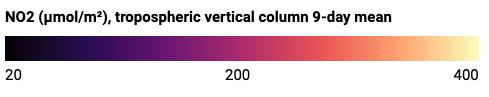


## Near Real-Time Sulphur Dioxide levels comparison

![](https://imgur.com/MhCpw19.gif)
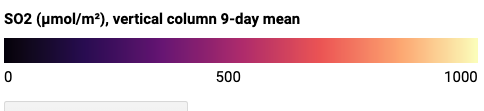

> ** 📌 Points to note :** 
> * Clearly, the Satellite images give a stunning picture of the present and past conditions which are clerly visible in the maps above.
